# Project 2 

The framework should import only torch.empty, and use no pre-existing neural-network python toolbox. Your code should work with autograd globally off, which can be achieved with torch . set˙grad˙enabled ( False )

In [1]:
import math
import torch 
import matplotlib.pyplot as plt
from utils import build_data, one_hot_encoding
torch.set_grad_enabled(False)

### Build the data

Generates a training and a test set of 1, 000 points sampled uniformly in [0, 1]², each with a label 0 if outside the disk centered at (0.5, 0.5) of radius 1/sqrt(2π), and 1 inside.

In [2]:
X_train, y_train = build_data(1000)  #(1000,2) , #(1000)
X_test, y_test = build_data(1000)  #(1000,2) , #(1000)

In [3]:
x = X_train[:,0]
y = X_train[:,1]
colors = { 1.0 : 'g', 0 : 'y'}

In [4]:
c = [ colors[label] for label in y_train.numpy()]

In [5]:
encoded_y_train = one_hot_encoding(y_train)
encoded_y_test = one_hot_encoding(y_test)

### Visualize the data

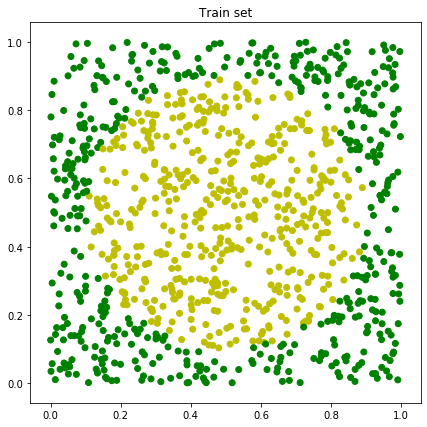

In [6]:
import matplotlib.pyplot as plt  # This is python's popular plotting library.

plt.figure(figsize=(7,7))
plt.scatter(x, y, c = c)
plt.title('Train set')
plt.show()

### Build the network

In [21]:
from linear import Linear
from sequential import Sequential

from activation_function.tanh import Tanh
from activation_function.sigmoid import Sigmoid
from activation_function.relu import ReLU
from activation_function.leakyReLu import LeakyReLU

from optimizer.sgd import SGD
from optimizer.momentum_sgd import MomentumSGDOptimizer
from optimizer.rmsprop import RMSPropOptimizer
from optimizer.adam import AdamOptimizer

from loss.LossMSE import LossMSE
from loss.LossBCE import LossBCE

from test import train_model
from predict import predict

In [24]:
rounds = 10

input_units = 2
hidden_units = 25
output_units = 2

epochs = 100
mini_batch_size = 1

result_rounds = []

for i in range(rounds):
    results = [] #training_losses, training_acc, test_losses, test_acc
        
    for opt_ in ['SGD', 'MOMENTUM', 'RMS','ADAM'] :
        
        print("Round {0} and optimizer {1} : ".format(i,opt_))
        model = Sequential(
                Linear(input_units, hidden_units),
                LeakyReLU(),
                Linear(hidden_units, hidden_units),
                LeakyReLU(),
                Linear(hidden_units, hidden_units),
                LeakyReLU(),
                Linear(hidden_units, output_units),
                Sigmoid()
                )

        model_trained, train_loss, train_acc, test_pred, test_loss, test_acc = train_model(model, X_train, y_train, X_test, y_test,
                                                                               epochs, mini_batch_size , lr = 0.01, opt = opt_)

        results.append([train_loss, train_acc, test_loss, test_acc])
    
    result_rounds.append(results)

Round 0 and optimizer SGD : 
On epoch 1 : We get on the test set an average loss of 0.49304757988452913 and an accuracy of 512
On epoch 10 : We get on the test set an average loss of 0.12312509917035641 and an accuracy of 918
On epoch 20 : We get on the test set an average loss of 0.11513678995160453 and an accuracy of 918
On epoch 30 : We get on the test set an average loss of 0.10728668401100845 and an accuracy of 919
On epoch 40 : We get on the test set an average loss of 0.11357744817033438 and an accuracy of 919
On epoch 50 : We get on the test set an average loss of 0.08860732502452831 and an accuracy of 940
On epoch 60 : We get on the test set an average loss of 0.05858226600395667 and an accuracy of 954
On epoch 70 : We get on the test set an average loss of 0.05043406152948064 and an accuracy of 962
On epoch 80 : We get on the test set an average loss of 0.05131637901725418 and an accuracy of 954
On epoch 90 : We get on the test set an average loss of 0.04261500770252654 and a

On epoch 40 : We get on the test set an average loss of 0.0918156534314491 and an accuracy of 931
On epoch 50 : We get on the test set an average loss of 0.07404974410797108 and an accuracy of 944
On epoch 60 : We get on the test set an average loss of 0.0672972346340791 and an accuracy of 955
On epoch 70 : We get on the test set an average loss of 0.053961070017093375 and an accuracy of 965
On epoch 80 : We get on the test set an average loss of 0.037365616910109464 and an accuracy of 982
On epoch 90 : We get on the test set an average loss of 0.053728613975816124 and an accuracy of 960
On epoch 100 : We get on the test set an average loss of 0.04881036046200286 and an accuracy of 964
Round 2 and optimizer SGD : 
On epoch 1 : We get on the test set an average loss of 0.49120378017425537 and an accuracy of 509
On epoch 10 : We get on the test set an average loss of 0.10455103248159867 and an accuracy of 945
On epoch 20 : We get on the test set an average loss of 0.07955251588813636 and

On epoch 80 : We get on the test set an average loss of 0.09048859730590555 and an accuracy of 945
On epoch 90 : We get on the test set an average loss of 0.11809541512258563 and an accuracy of 930
On epoch 100 : We get on the test set an average loss of 0.06471107884231427 and an accuracy of 961
Round 3 and optimizer ADAM : 
On epoch 1 : We get on the test set an average loss of 0.1735076212191807 and an accuracy of 886
On epoch 10 : We get on the test set an average loss of 0.07919567965160751 and an accuracy of 941
On epoch 20 : We get on the test set an average loss of 0.07951381686280928 and an accuracy of 942
On epoch 30 : We get on the test set an average loss of 0.06941422711159445 and an accuracy of 944
On epoch 40 : We get on the test set an average loss of 0.051543370467151385 and an accuracy of 963
On epoch 50 : We get on the test set an average loss of 0.051349284586644284 and an accuracy of 964
On epoch 60 : We get on the test set an average loss of 0.06425869309636305 an

On epoch 10 : We get on the test set an average loss of 0.0942324037840162 and an accuracy of 929
On epoch 20 : We get on the test set an average loss of 0.10109639754455212 and an accuracy of 937
On epoch 30 : We get on the test set an average loss of 0.07830495222433603 and an accuracy of 953
On epoch 40 : We get on the test set an average loss of 0.0924209415638521 and an accuracy of 940
On epoch 50 : We get on the test set an average loss of 0.09937837984436614 and an accuracy of 941
On epoch 60 : We get on the test set an average loss of 0.051312234174450674 and an accuracy of 964
On epoch 70 : We get on the test set an average loss of 0.11100605994704772 and an accuracy of 933
On epoch 80 : We get on the test set an average loss of 0.0994328872128842 and an accuracy of 942
On epoch 90 : We get on the test set an average loss of 0.05981964379139379 and an accuracy of 961
On epoch 100 : We get on the test set an average loss of 0.05977630030936612 and an accuracy of 966
Round 5 and

On epoch 50 : We get on the test set an average loss of 0.1370675186500641 and an accuracy of 904
On epoch 60 : We get on the test set an average loss of 0.09659078128400386 and an accuracy of 937
On epoch 70 : We get on the test set an average loss of 0.11415092104547445 and an accuracy of 926
On epoch 80 : We get on the test set an average loss of 0.07065191026651221 and an accuracy of 950
On epoch 90 : We get on the test set an average loss of 0.05217266693780922 and an accuracy of 961
On epoch 100 : We get on the test set an average loss of 0.043862286520833044 and an accuracy of 971
Round 7 and optimizer RMS : 
On epoch 1 : We get on the test set an average loss of 0.1532911534927901 and an accuracy of 882
On epoch 10 : We get on the test set an average loss of 0.08690772862000762 and an accuracy of 933
On epoch 20 : We get on the test set an average loss of 0.05783192209075204 and an accuracy of 960
On epoch 30 : We get on the test set an average loss of 0.08960972155763605 and a

On epoch 90 : We get on the test set an average loss of 0.06312681756774569 and an accuracy of 951
On epoch 100 : We get on the test set an average loss of 0.043943019565198055 and an accuracy of 969
Round 9 and optimizer MOMENTUM : 
On epoch 1 : We get on the test set an average loss of 0.44106077402830124 and an accuracy of 639
On epoch 10 : We get on the test set an average loss of 0.15161341599761569 and an accuracy of 896
On epoch 20 : We get on the test set an average loss of 0.08226902711166655 and an accuracy of 941
On epoch 30 : We get on the test set an average loss of 0.08758487120289485 and an accuracy of 943
On epoch 40 : We get on the test set an average loss of 0.06797757691787037 and an accuracy of 954
On epoch 50 : We get on the test set an average loss of 0.09502584328752837 and an accuracy of 935
On epoch 60 : We get on the test set an average loss of 0.11184125651153524 and an accuracy of 923
On epoch 70 : We get on the test set an average loss of 0.0597544724214886

In [25]:
import numpy as np 

means = np.array(result_rounds).mean(0) #train_loss, train_acc, test_loss, test_acc
std = np.array(result_rounds).std(0)

In [46]:
def plots_results(round_results):
    
    colors = ['b', 'g', 'r', 'm']

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

    means = np.array(round_results).mean(axis= 0)
    std  = np.array(round_results).std(axis = 0)
    dict_word = {False :'without', True : 'with'}
    for i, (r,s,p) in enumerate( zip(means,std,['SGD', 'MOMENTUM', 'RMS','ADAM']) ):

        ax1.plot(r[0], color = colors[i], label = 'training loss with optimizer {0}'.format(p))
        #ax1.plot(r[2], color = colors[i],  linestyle='dashed', label = 'test loss  with optimizer {0}'.format(p))

        ax1.fill_between(range(len(r[0])), r[0] - s[0], r[0]+ s[0], alpha = 0.2, color = colors[i])
        #ax1.fill_between(range(len(r[2])), r[2]- s[2], r[2]+ s[2], alpha = 0.2, color = colors[i])

        ax2.plot(r[1], color = colors[i], label = 'training accuracy  with optimizer {0}'.format(p))
        #ax2.plot(r[3], color = colors[i], linestyle='dashed', label = 'test accuracy  with optimizer {0}'.format(p))

        ax2.fill_between(range(len(r[1])), r[1]- s[1], r[1]+ s[1], alpha = 0.2, color = colors[i])
        #ax2.fill_between(range(len(r[3])), r[3]- s[3], r[3]+ s[3], alpha = 0.2, color = colors[i])

    ax1.set_title('Training Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})

    ax2.set_title('Training accuracy ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("Accuracy",{'fontsize':18})

    ax1.legend(loc = 'upper right',fontsize= 'large')
    ax2.legend(loc = 'lower right',fontsize= 'large')
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    plt.show()

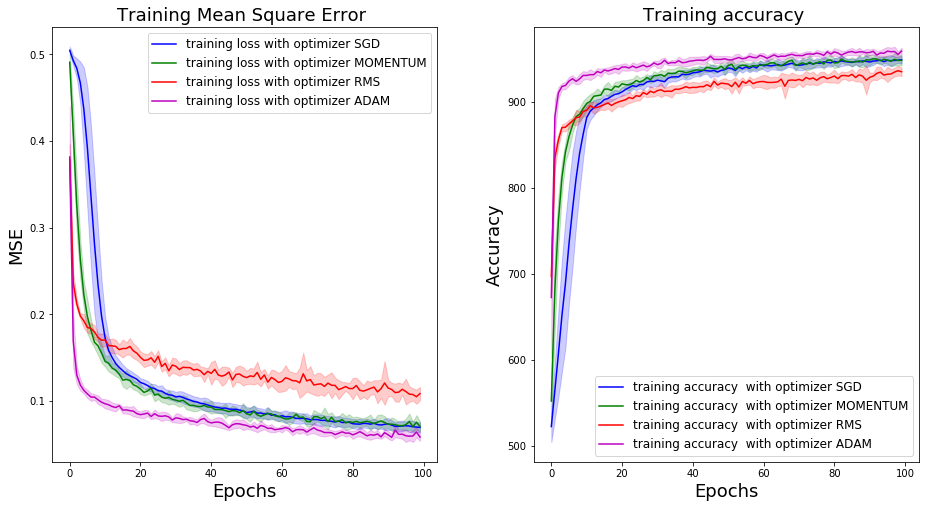

In [47]:
plots_results(result_rounds)

In [ ]:
mse_results = result_rounds.copy()

In [ ]:
plt.plot(loss_epoch)
plt.title('Average loss per epoch')
plt.show()

In [ ]:
plt.plot(total_acc)
plt.title('Accuracy on train set per epoch')
plt.show()

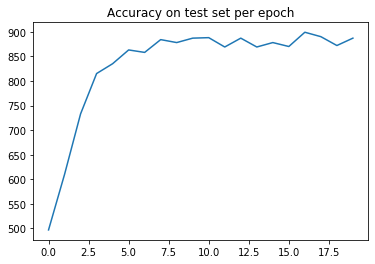

In [65]:
plt.plot(test_acc)
plt.title('Accuracy on test set per epoch')
plt.show()

## Visualize the decision boundary 

In [36]:
X_viz, y_viz = build_data(10000)

In [37]:
x_viz = X_viz[:,0]
y_viz= X_viz[:,1]

In [ ]:
c_viz = [ colors[label] for label in y_train.numpy()]

## Pytorch

In [ ]:
import torch.nn as nn

torch.set_grad_enabled(True)

model_torch = nn.Sequential(
            nn.Linear(input_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_units),
            nn.Sigmoid()
)

In [ ]:
def train_model(model, train_input, train_target, mini_batch_size):
    criterion = nn.MSELoss()
    eta = 1e-1

    for e in range(25):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            loss.backward()
            sum_loss = sum_loss + loss.item()
            with torch.no_grad():
                for p in model.parameters():
                    p -= eta * p.grad
        print(e, sum_loss)
    
    return model

def compute_nb_errors(model, input, target, mini_batch_size):
    nb_errors = 0

    for b in range(0, input.size(0), mini_batch_size):
        output = model(input.narrow(0, b, mini_batch_size))
        _, predicted_classes = output.max(1)
        for k in range(mini_batch_size):
            if target[b + k, predicted_classes[k]] <= 0:
                nb_errors = nb_errors + 1

    return nb_errors

In [ ]:
#one hot encoding 
encoded_y_train = one_hot_encoding(y_train)

In [ ]:
train_model(model_torch, X_train, encoded_y_train, 5)

In [ ]:
compute_nb_errors(model, input, target, mini_batch_size)